In [1]:
from importlib import reload

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import nn.model_vizualisation.vizualizer as viz


def reload_modules():
    for modl in [viz]:
        reload(modl)
reload_modules()

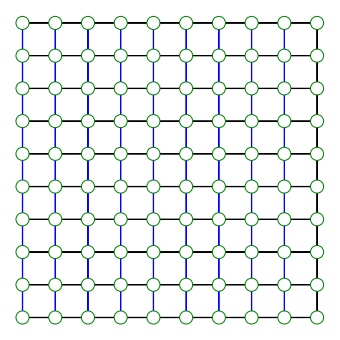

In [2]:
## une figure
plt.figure(figsize=(6,6))
ax = plt.subplot(aspect='equal')
plt.axis('off')

def pdot(x,y,col,full=False):
    if full:
        plt.gcf().gca().add_artist(plt.Circle((x, y), .02, ec=col, color=col))
    else:
        plt.gcf().gca().add_artist(plt.Circle((x,y), .02, ec=col, color='white'))
        
X = np.arange(0.05, 1, step=0.1) ## on ne commence pas à zéro 
Y = X

## tracer les sommets
for x in X:
    for y in Y:
        pdot(x, y, col='green', full=False)
        
        
## draw edges
for x in X[0:-1]:
    plt.arrow(x, Y[-1], 0.1, 0, fc='k', ec='k')
    plt.arrow(X[-1], x, 0, 0.1, fc='k', ec='k')
    for y in Y[0:-1]:
        plt.arrow(x, y, 0, 0.1, fc='b', ec='b');
        plt.arrow(x, y, 0.1, 0, fc='k', ec='k')
           
plt.show()

In [3]:
def plot_img_on_ax(ax, img, coords):
    ax.imshow(img, extent=(coords[0], coords[0] + img.shape[0], coords[1], coords[1] + img.shape[1]))

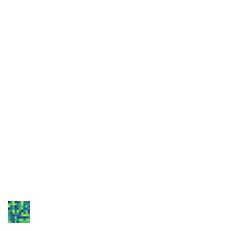

In [7]:
img = np.random.rand(10, 10)

fig, ax = plt.subplots(1, 1)

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

ax.set_axis_off()

plot_img_on_ax(ax, img, (0.5, 0.5))
ax.arr

0.0 -0.5
-0.5 11.5
-0.5 4.5


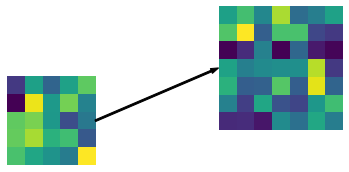

In [39]:
reload_modules()

canva = viz.Canva()

img1 = np.random.rand(10, 10)
img2 = np.random.rand(10, 10)

elt1 = viz.ElementImage(img1)
elt2 = viz.ElementImage(img2)

# canva.set_lims((0, 20), (0, 20))
canva.add_element(elt1, key='elt1', new_shape=(5, 5), coords=(2, 3))
canva.add_element(elt2, key='elt2', new_shape=(7, 7), coords=(15, 6))

arrow1 = viz.ElementArrow.link_elements(canva.elements['elt1'], canva.elements['elt2'], width=0.1, color='k')
canva.add_element(arrow1, key='arrow1')

# canva.ax.imshow(img1)
canva.show();

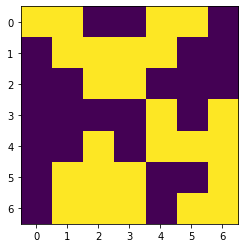

In [50]:
plt.imshow(weights[0, 0])

/media/theodore/HDD1/Projets_Python/tapy/nn/model_vizualisation/vizualizer.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


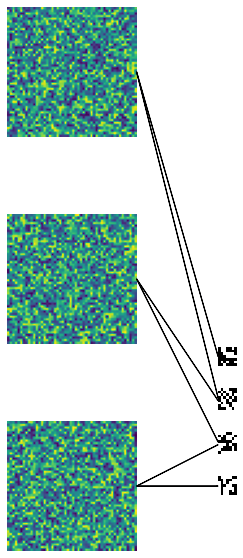

In [63]:
reload_modules()

canva = viz.Canva(figsize=(10, 10))

img = np.random.rand(50, 50, 3)

weights = {}
for chan_input in range(3):
    for chan_output in range(2):
        weights[chan_output, chan_input] = np.random.randint(0, 2, (7, 7))

for chan_input in range(img.shape[-1]):
    canva.add_element(
        element=viz.ElementImage(img[..., chan_input]),
        key=f"chin_{chan_input}",
        coords=(0, chan_input * (len(img) + 30))
    );

for chan_input in range(img.shape[-1]):
    for chan_output in range(2):
        canva.add_element(
            element=viz.ElementImage(weights[chan_output, chan_input]),
            key=f"weights_chin_{chan_input}_chout_{chan_output}",
            coords=(img.shape[0] + 10,16 * chan_input + chan_output * 16 + chan_input),
            imshow_kwargs={'cmap': 'gray', "interpolation": "nearest"}
        );

for chan_input in range(img.shape[-1]):
    for chan_output in range(2):
        canva.add_element(
            element=viz.ElementArrow.link_elements(
                canva.elements[f"chin_{chan_input}"], canva.elements[f"weights_chin_{chan_input}_chout_{chan_output}"])
        );

canva.show();

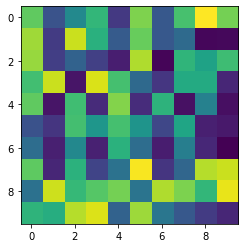

In [13]:
plt.imshow(img1)